<a href="https://colab.research.google.com/github/monicafar147/regression-predict-api-template/blob/Wright/Wright.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   make sure you are working in your own branch that you cloned from git
*   to commit your notebook changes to git:
1.   file
2.   save a copy in github
3.   choose your branch from branches dropdown
4.   change commit message to what you did e.g. "fixed dataframe indexes"
5.   click ok

# Introduction to problem and dataset

## Problems to fix

* Since most of the time columns take place within 1-2 hours, the current solution of only extracting the hours is poor. Perhaps, since the y-variable is in seconds, we can convert all the time columns to something like "seconds after midnight"
* There are `Time from Pickup to Arrival` values of 1, which seems unrealistic considering the data is measured in seconds. We should investigate the actual difference between the `Arrival at Destination - Time` and `Pickup - Time` columns before we drop the `Arrival at Destination - Time` column.
* We still haven't got a solution for the `Rider Id` column to turn it into a categorical variable.

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(palette='pastel')

## Importing the datasets and splitting it into features and outputs

In [0]:
orders = pd.read_csv(r'Train.csv', parse_dates=['Pickup - Time', 'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Arrival at Destination - Time'])
training_features = orders.iloc[:, :-1]
training_outputs = orders.iloc[:, -1]
test_features = pd.read_csv(r'Test.csv', parse_dates=['Pickup - Time', 'Placement - Time', 'Confirmation - Time'])

In [0]:
training_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Order No                                   21201 non-null  object        
 1   User Id                                    21201 non-null  object        
 2   Vehicle Type                               21201 non-null  object        
 3   Platform Type                              21201 non-null  int64         
 4   Personal or Business                       21201 non-null  object        
 5   Placement - Day of Month                   21201 non-null  int64         
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64         
 7   Placement - Time                           21201 non-null  datetime64[ns]
 8   Confirmation - Day of Month                21201 non-null  int64         
 9   Confirmation - We

In [0]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Order No                              7068 non-null   object        
 1   User Id                               7068 non-null   object        
 2   Vehicle Type                          7068 non-null   object        
 3   Platform Type                         7068 non-null   int64         
 4   Personal or Business                  7068 non-null   object        
 5   Placement - Day of Month              7068 non-null   int64         
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64         
 7   Placement - Time                      7068 non-null   datetime64[ns]
 8   Confirmation - Day of Month           7068 non-null   int64         
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64         
 10  

In [0]:
training_outputs

0         745
1        1993
2         455
3        1341
4        1214
         ... 
21196       9
21197     770
21198    2953
21199    1380
21200    2128
Name: Time from Pickup to Arrival, Length: 21201, dtype: int64

At this stage, we notice that there are missing values from `Temperature` and `Precipitation in millimeters`. We also need to convert all the columns that contain time information from objects to a datetime format.

# Exploratory Data Analysis

To first get well-acquainted with the data, we will first explore any obvious relationships between variables.

In [0]:
training_features.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779


In [0]:
test_features.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long
count,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,5631.000000,199.000000,7068.000000,7068.000000,7068.000000,7068.000000
mean,2.752122,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,9.458970,23.246120,6.651759,-1.282043,36.811148,-1.282255,36.811326
std,0.624000,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,5.575689,3.591161,14.085439,0.030044,0.037962,0.034236,0.043507
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.200000,0.100000,-1.433512,36.653828,-1.422652,36.639195
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.100000,-1.301201,36.784605,-1.300921,36.786546
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.400000,2.900000,-1.281301,36.807219,-1.283219,36.807927
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.900000,4.950000,-1.257274,36.829716,-1.261256,36.828195
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,47.000000,32.100000,99.100000,-1.148352,36.991046,-1.030225,37.018958


In [0]:
training_outputs.describe()

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64

## Creating ECDF Plots for Distances and Delivery Times

In [0]:
distances = np.sort(orders['Distance (KM)'])
distances_ecdf = np.arange(1, len(distances) + 1) / len(distances)
delivery_times = np.sort(orders['Time from Pickup to Arrival'])
delivery_times_ecdf = np.arange(1, len(delivery_times) + 1) / len(delivery_times)

## ECDF Plot for Distances

Text(0, 0.5, 'Distances ECDF')

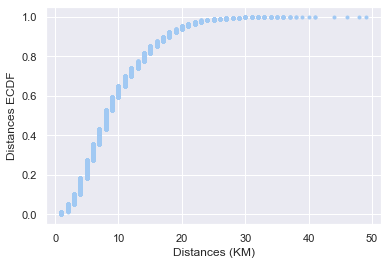

In [0]:
plt.plot(distances, distances_ecdf, marker='.', linestyle='none')
plt.xlabel('Distances (KM)')
plt.ylabel('Distances ECDF')

We see that 60 and 95 percent of deliveries are within 10KM and 20KM respectively.

## ECDF Plot for DElivery Times

Text(0, 0.5, 'Delivery Times ECDF')

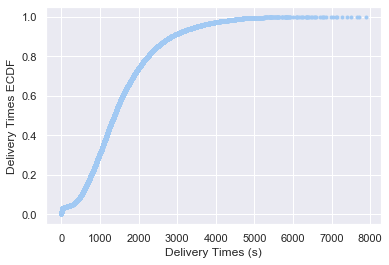

In [0]:
plt.plot(delivery_times, delivery_times_ecdf, marker='.', linestyle='none')
plt.xlabel('Delivery Times (s)')
plt.ylabel('Delivery Times ECDF')

With the time distributions we see that 60 and 95 percent of the delivery times are within approximately 1500(s) and 3000(s)

Based on the above distrubutions it would be interesting to build a simple Linear Regression model using only the Distance feature in our model.

### NOTE  - PLOT THE ABOVE PLOTS SIDE BY SIDE, DO LATER...

## Modifying data characteristics in thenorders data

In [0]:
orders[['Vehicle Type', 'Platform Type', 'Personal or Business']] = orders[['Vehicle Type', 'Platform Type', 'Personal or Business']].astype('category')
orders[['Placement - Day of Month', 'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)']] = orders[['Placement - Day of Month', 'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)']].astype('category')
orders[['Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)']] = orders[['Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)']].astype('category')

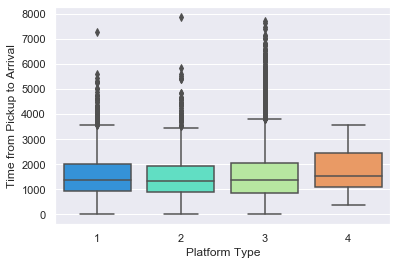

In [0]:
sns.boxplot(x='Platform Type', y='Time from Pickup to Arrival', data=orders, palette='rainbow')

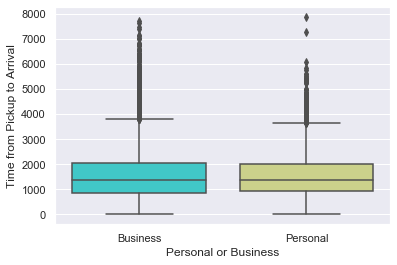

In [0]:
sns.boxplot(x='Personal or Business', y='Time from Pickup to Arrival', data=orders, palette='rainbow')

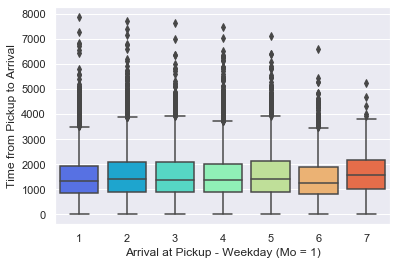

In [0]:
sns.boxplot(x='Arrival at Pickup - Weekday (Mo = 1)', y='Time from Pickup to Arrival', data=orders, palette='rainbow')

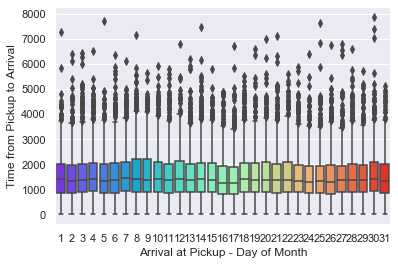

In [0]:
sns.boxplot(x='Arrival at Pickup - Day of Month', y='Time from Pickup to Arrival', data=orders, palette='rainbow')

### NOTE:  X-AXIS NEEDS FIXING

These boxplots, which each represent several categoral features plotted against the delivery times, indicate that there doesn't seem to be a huge difference in travel time between the different groups in each category. There are quite a number of outliers in all of the groups in each of the categories?

## Correlations

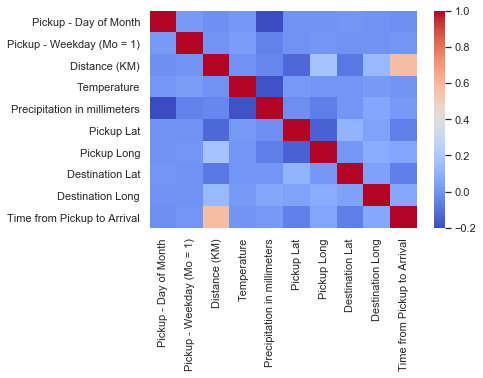

In [0]:
orders_corr = orders.corr()
sns.heatmap(orders_corr, cmap='coolwarm')

# Data Preprocessing

## Dealing with missing values

As described above, there are null-values present in the `Temperature` and `Precipitation in millimeters` columns.

We would be able to fill the missing `Temperature` values with values from the same dates where measurements were taken, but we don't know the actual date of each measurement. The easiest option would be to fill the missing values with the average of the column, but we should find a better way of doing this.

We are assuming that if `Precipitation in millimeters` is missing, that it was not raining on that day. We can therefore fill null values with 0.

In [0]:
# Fill missing precipitation values with 0
training_features['Precipitation in millimeters'] = training_features['Precipitation in millimeters'].fillna(value=0)

# Fill missing temperature values with averages
training_features['Temperature'] = training_features['Temperature'].fillna(training_features['Temperature'].mean())

##  Converting the following features into categories
1.   Pickup - Day of Month
2.   Pickup - Weekday (Mo = 1)
3.   Platform Type
4.   Personal or Business

In [0]:
training_features[['Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)']] = training_features[['Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)']].astype('category')
training_features[['Platform Type', 'Personal or Business']] = training_features[['Platform Type', 'Personal or Business']].astype('category')

##  Selecting the following features to be part of the training data
1.   Platform Type
2.   Personal or Business
3.   Pickup - Day of Month
4.   Pickup - Weekday (Mo = 1)
5.   Pickup - Time
6.   Distance (KM)
7.   Temperature
8.   Precipitation in millimeters

In [0]:
training_features = training_features[['Platform Type', 'Personal or Business', 'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time', 'Distance (KM)', 'Temperature', 'Precipitation in millimeters']]

####  Function for assigning the different Pickup Times to 6 distinct groups
1.   Early Morning
2.   Morning
3.   Late Morning
4.   Afternoon
5.   Late Afternoon
6.   Evening

In [0]:
def assign_time_category(delivery_time):
    dts = pd.DataFrame(['12:00:00 AM', '6:00:00 AM', '9:00:00 AM', '12:00:00 PM', '3:00:00 PM', '6:00:00 PM'])[0].astype('datetime64[ns]')
    if delivery_time >= dts[0] and delivery_time < dts[1]:
        return 'Early Morning'
    elif delivery_time >= dts[1] and delivery_time < dts[2]:
        return 'Morning'
    elif delivery_time >= dts[2]  and delivery_time < dts[3]:
        return 'Late Morning'
    elif delivery_time >= dts[3] and delivery_time < dts[4]:
        return 'Afternoon'
    elif delivery_time >= dts[4] and delivery_time < dts[5]:
        return 'Late Afternoon'
    else:
        return 'Evening'

## Adding new feature called "Delivery Times"
1.   This new feature is based on the "Pickup Time" feature
2.   Its created using the (assign_time_category) function
3.   Then is changed into a categorical feature

In [0]:
training_features['Delivery Times'] = training_features['Pickup - Time'].apply(assign_time_category)
training_features['Delivery Times'] = training_features['Delivery Times'].astype('category')

## Dropping the "Pickup Times" feature

In [0]:
training_features.drop('Pickup - Time', axis=1, inplace=True)

## Encoding data

### One-hot encoding for categorical data

In [0]:
training_features = pd.get_dummies(training_features,
                                   columns=['Platform Type', 'Personal or Business', 'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Delivery Times'],
                                   prefix=['platformtype', 'personalbusiness', 'dayofmonth', 'weekday', 'pickuptimes'])

# Model Building

In [0]:
from sklearn import metrics
import math

## Multiple Linear Regression Model

In [0]:
# Import LinearRegression module and create object
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# Fit a linear regression model
linear_model.fit(training_features, training_outputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print("Training MSE:", metrics.mean_squared_error(training_outputs, linear_model.predict(training_features)))

Training MSE: 639920.1123943416


In [0]:
print("Training RMSE:", np.sqrt(metrics.mean_squared_error(training_outputs, linear_model.predict(training_features))))

Training RMSE: 799.9500686882536


## Regression Tree Model

In [0]:
from sklearn.tree import DecisionTreeRegressor
regression_tree = DecisionTreeRegressor(random_state = 0)
regression_tree.fit(training_features, training_outputs)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [0]:
print("Training MSE:", metrics.mean_squared_error(training_outputs, regression_tree.predict(training_features)))

Training MSE: 83011.49675032175


In [0]:
print("Training RMSE:", np.sqrt(metrics.mean_squared_error(training_outputs, regression_tree.predict(training_features))))

Training RMSE: 288.1171580283301


## Random Forest Model

In [0]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 7, random_state = 0)
random_forest.fit(training_features, training_outputs)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=7, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
print("Training MSE:", metrics.mean_squared_error(training_outputs, random_forest.predict(training_features)))

Training MSE: 207730.54555147304


In [0]:
print("Training RMSE:", np.sqrt(metrics.mean_squared_error(training_outputs, random_forest.predict(training_features))))

Training RMSE: 455.7746653242949
